# Homework 4 Solutions

## FINM 36700 - 2024

### UChicago Financial Mathematics
* Austin Galm
* agalm@uchicago.edu

## DFA Case



### Notation
(Hidden LaTeX commands)







$$\newcommand{\mux}{\tilde{\boldsymbol{\mu}}}$$
$$\newcommand{\wtan}{\boldsymbol{\text{w}}^{\text{tan}}}$$
$$\newcommand{\wtarg}{\boldsymbol{\text{w}}^{\text{port}}}$$
$$\newcommand{\mutarg}{\tilde{\boldsymbol{\mu}}^{\text{port}}}$$
$$\newcommand{\wEW}{\boldsymbol{\text{w}}^{\text{EW}}}$$
$$\newcommand{\wRP}{\boldsymbol{\text{w}}^{\text{RP}}}$$
$$\newcommand{\wREG}{\boldsymbol{\text{w}}^{\text{REG}}}$$

### Dimensional Fund Advisors, 2002 [HBS 9-203-026].

**Note:** Pages 1-5 of the case are required. Pages 6-11 get into interesting issues around trading (especially adverse selection) and tax considerations. These sections are useful for building market knowledge, but we will not cover them.


## 1. DFA's Strategy

<i> This section is not graded, and you do not need to submit your answers. But you are expected to consider these issues and be ready to discuss them.</i>

### 1.1 Investment Philosophy

#### 1.1.a) In 100 words or less, describe DFA's belief about how to find premium in the market.

<span style="color:red;">

DFA believed market was "efficient". Therefore, the firm primarily based its strategy on the Fama-French 3 factor model which postulates that high market-beta, High Book-to-market and small stocks provided risk premiums. Much of this belief was driven by research highlighting market phenomena conducted on data prior to the 1980's. In addition to this fundamental belief about where value lies in the markets, they generated excess returns in their trading operations through tax-efficient, and transaction-cost efficient investing. 

</span>

#### 1.1.b) To what degree does their strategy rely on individual equity analysis? Macroeconomic fundamentals? Efficient markets?

<span style="color:red;">

* **Individual Equity Analysis:** DFA's strategies rely a little on individual equity analysis. They focus first on distilling investment opportunities through their beliefs about efficient markets. Then, they may do some individual company analysis after focusing on their preferred opportunity set.

* **Macroeconomic Fundamentals:** DFA's strategies relied even less on macroeconomic fundamentals. They took long-term views on their investments, so responding to short-term shifts in macroeconomic phenomena was not a part of their investment philosophy. The only macroeconomic trends they may concern themselves with are those that have persistent long-term impacts on their core beliefs about efficient markets.

* **Efficient Markets:** DFA's strategies hinged entirely on their belief that markets were efficient. They believed that markets reflected all available information about companies in their prices, and they believed that decomposing the information in these prices could illuminate valuable investment opportunities for long-term returns.

Beyond these elements, DFA relies on optimized execution, market-making, and tax considerations to generate excess return.

</span>

#### 1.1.c) Are DFA's funds active or passive?

<span style="color:red;">

DFA's funds are passive, tracking index portfolios exposed to the Fama French factors.

</span>

#### 1.1.d) What do DFA and others mean by a "value" stock? And a "growth" stock?

<span style="color:red;">

* **Value:** Stocks with high book-to-market ratios (Book Value of Equity/Market Value of Equity). These stocks show a lot of accounting value, (via book equity,) relative to the market price, (market equity).

* **Growth:** Stocks with low book to market ration (BE/ME)

**Note:** Other accounting measures that can be used for this classification are earnings-price ratios or dividend-price ratios. Earnings can be negative and thus are generally avoided.

</span>

### 2.2 Challenges for DFA's view.
#### 2.2.a) What challenge did DFA's model see in the 1980's?

<span style="color:red;">

The US was into a deep recession in 1980 and small companies were particularly hard hit. Even with the subsequent boom in the economy, small companies continued to lag. As a consequence, DFA needed to assess whether this under-performance was temporary or the size factor had a systematic flaw.

</span>

#### 2.2.b) And in the 1990's?

<span style="color:red;">

In the 1990's, DFA saw value stocks greatly under-perform growth stocks, partially driven by the incredible returns of internet tech stocks. This trend reversed, briefly, in 2000 and 2001 when value stocks greatly outperformed growth stocks due to the crash of the internet tech bubble.

</span>

### 2.3 The market.

#### 2.3.a) Exhibit 3 has data regarding a universe of 5,020 firms. How many are considered "large cap"? What percent of the market value do they account for?

<span style="color:red;">

In the exhibit there are 207 large cap firms ( < 5% of total count), yet they constitute about 70% of the market cap in the universe.

</span>

#### 2.3.b) Exhibit 6 shows that the U.S. value factor (HML) has underperformed the broader U.S. equity market in 1926-2001, including every subsample except 1963-1981. So why should an investor be interested in this value factor?

<span style="color:red;">

Even if Value has underperformed the market in these subsamples, it's imperfect correlation with the market could lead to diversification benefits as we saw in prior cases related to MV optimization. This idea is evaluated further in question 4 below.This imperfect correlation can lead to risk reduction at the margin for any investor completely invested in funds tracking the broader equity index.

</span>


# Imports

In [1]:
import os
import sys
import pandas as pd
from scipy.stats import norm, chi2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
grandparent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
sys.path.insert(0, parent_dir)
sys.path.insert(0, grandparent_dir)
import cmds.portfolio_management_helper as pmh

plt.style.use("seaborn-v0_8-whitegrid")
PLOT_WIDTH, PLOT_HEIGHT = 8, 5
COLORS = ["blue", "red", "orange"]

warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.4f}".format
p = plt.rcParams

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Reading the Data

In [2]:
data_path = parent_dir + '/data/'
rf_rate = pmh.read_excel_default(data_path + 'dfa_analysis_data.xlsx', 
                                 sheet_name='factors',
                                 index_col='Date', parse_dates=True)[['RF']]
factors = pmh.read_excel_default(data_path + 'dfa_analysis_data.xlsx', 
                                 sheet_name='factors',
                                 index_col='Date', parse_dates=True).drop(columns='RF')
portfolio_rets = pmh.read_excel_default(data_path + 'dfa_analysis_data.xlsx', 
                                        sheet_name='portfolios (total returns)',
                                        index_col='Date', parse_dates=True)

In [3]:
display(portfolio_rets)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.0582,-0.0170,0.0049,-0.0146,0.0205,0.0121,0.0242,0.0049,-0.0260,-0.0033,...,0.0159,0.0153,0.0130,0.0027,0.0247,0.0345,0.0609,0.0203,0.0311,0.0056
1926-08-31,-0.0202,-0.0803,0.0138,0.0146,0.0840,0.0236,-0.0118,0.0401,0.0050,0.0617,...,0.0133,0.0387,0.0200,0.0217,0.0534,0.0101,0.0419,0.0201,0.0548,0.0776
1926-09-30,-0.0483,-0.0262,-0.0434,-0.0327,0.0086,-0.0265,-0.0126,0.0108,-0.0355,-0.0094,...,0.0109,-0.0053,-0.0176,0.0146,0.0087,-0.0129,0.0365,0.0009,-0.0075,-0.0243
1926-10-31,-0.0937,-0.0355,-0.0349,0.0344,-0.0255,-0.0281,-0.0327,-0.0507,-0.0802,-0.0132,...,-0.0334,-0.0266,-0.0211,-0.0311,-0.0535,-0.0274,-0.0301,-0.0224,-0.0467,-0.0581
1926-11-30,0.0559,0.0419,0.0246,-0.0445,0.0054,0.0310,-0.0237,0.0301,0.0515,0.0273,...,0.0344,0.0239,0.0373,0.0493,0.0182,0.0429,0.0253,0.0152,0.0366,0.0256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,-0.1254,-0.0719,-0.0751,-0.0744,-0.0755,-0.0683,-0.0827,-0.0634,-0.0561,-0.0687,...,-0.0572,-0.0643,-0.0600,-0.0686,-0.0573,-0.0400,0.0119,-0.0447,-0.0499,-0.0547
2024-05-31,0.0723,0.0325,0.0493,0.0356,0.0479,0.0460,0.0323,0.0551,0.0484,0.0507,...,0.0257,0.0218,0.0239,0.0529,0.0361,0.0598,0.0420,0.0305,0.0405,0.0427
2024-06-30,-0.0430,-0.0232,-0.0560,-0.0164,-0.0256,-0.0192,-0.0208,-0.0206,-0.0154,-0.0288,...,-0.0061,-0.0176,-0.0229,-0.0166,-0.0275,0.0612,0.0111,0.0032,-0.0167,0.0061


### Converting total returns to excess returns in the portfolio

In [4]:
pf_excess_rets = portfolio_rets.sub(rf_rate.values)

In [5]:
display(pf_excess_rets)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.0560,-0.0192,0.0027,-0.0168,0.0183,0.0099,0.0220,0.0027,-0.0282,-0.0055,...,0.0137,0.0131,0.0108,0.0005,0.0225,0.0323,0.0587,0.0181,0.0289,0.0034
1926-08-31,-0.0227,-0.0828,0.0113,0.0121,0.0815,0.0211,-0.0143,0.0376,0.0025,0.0592,...,0.0108,0.0362,0.0175,0.0192,0.0509,0.0076,0.0394,0.0176,0.0523,0.0751
1926-09-30,-0.0506,-0.0285,-0.0457,-0.0350,0.0063,-0.0288,-0.0149,0.0085,-0.0378,-0.0117,...,0.0086,-0.0076,-0.0199,0.0123,0.0064,-0.0152,0.0342,-0.0014,-0.0098,-0.0266
1926-10-31,-0.0969,-0.0387,-0.0381,0.0312,-0.0287,-0.0313,-0.0359,-0.0539,-0.0834,-0.0164,...,-0.0366,-0.0298,-0.0243,-0.0343,-0.0567,-0.0306,-0.0333,-0.0256,-0.0499,-0.0613
1926-11-30,0.0528,0.0388,0.0215,-0.0476,0.0023,0.0279,-0.0268,0.0270,0.0484,0.0242,...,0.0313,0.0208,0.0342,0.0462,0.0151,0.0398,0.0222,0.0121,0.0335,0.0225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,-0.1301,-0.0766,-0.0798,-0.0791,-0.0802,-0.0730,-0.0874,-0.0681,-0.0608,-0.0734,...,-0.0619,-0.0690,-0.0647,-0.0733,-0.0620,-0.0447,0.0072,-0.0494,-0.0546,-0.0594
2024-05-31,0.0679,0.0281,0.0449,0.0312,0.0435,0.0416,0.0279,0.0507,0.0440,0.0463,...,0.0213,0.0174,0.0195,0.0485,0.0317,0.0554,0.0376,0.0261,0.0361,0.0383
2024-06-30,-0.0471,-0.0273,-0.0601,-0.0205,-0.0297,-0.0233,-0.0249,-0.0247,-0.0195,-0.0329,...,-0.0102,-0.0217,-0.0270,-0.0207,-0.0316,0.0571,0.0070,-0.0009,-0.0208,0.0020


## 2. The Factors

DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a "size" and "value" factor. Note that these three factors are already listed as excess returns. 
Use the data found in <file>'dfa analysis data.xlsx'</file>.

**FACTORS:** Monthly excess return data for the overall equity market, $\tilde{r}^{m}$. The sheet also contains data on two additional factors, SMB and HML, as well as the risk-free rate. You do not need any of these columns for the homework. Just use the MKT column, which is excess market returns. (So no need to subtract the risk-free rate.)

### 2.1 Calculate their univariate performance statistics:
* Mean
* Volatility
* Sharpe
* VaR(.05)

In [6]:
pmh.calc_summary_statistics(factors, annual_factor=12, correlations=False, provided_excess_returns=True,
                            keep_columns=['Annualized Mean',
                                            'Annualized Vol',
                                            'Annualized Sharpe',
                                            'Annualized Historical VaR',
                                            'Annualized Historical CVaR']).T

,Mkt-RF,SMB,HML
Annualized Mean,0.0822,0.0212,0.0412
Annualized Vol,0.1847,0.1100,0.1236
Annualized Sharpe,0.4452,0.1929,0.3337
Annualized Historical VaR (5.00%),-0.2747,-0.1462,-0.1458
Annualized Historical CVaR (5.00%),-0.4165,-0.2031,-0.2314


### Report these for the following three subsamples:
* Beginning - 1980
* 1981 - 2001
* 2002 - End

In [7]:
pmh.calc_summary_statistics(factors, annual_factor=12, correlations=False, provided_excess_returns=True, 
                            timeframes={'Beginning-1980':[None, '1980'],
                                        '1981-2001': ['1981', '2001'],
                                        '2002-End': ['2002', None]},
                            keep_columns=['Annualized Mean',
                                            'Annualized Vol',
                                            'Annualized Sharpe',
                                            'Annualized Historical VaR',
                                            'Annualized Historical CVaR']).T

,Mkt-RF Beginning-1980,SMB Beginning-1980,HML Beginning-1980,Mkt-RF 1981-2001,SMB 1981-2001,HML 1981-2001,Mkt-RF 2002-End,SMB 2002-End,HML 2002-End
Annualized Mean,0.0811,0.0340,0.0495,0.0773,-0.0009,0.0638,0.0895,0.0110,0.0005
Annualized Vol,0.2051,0.1146,0.1338,0.1574,0.1183,0.1112,0.1546,0.0889,0.1073
Annualized Sharpe,0.3957,0.2966,0.3697,0.4908,-0.0073,0.5736,0.5787,0.1238,0.0050
Annualized Historical VaR (5.00%),-0.2909,-0.1503,-0.1486,-0.2236,-0.1611,-0.1448,-0.2727,-0.1353,-0.1429
Annualized Historical CVaR (5.00%),-0.4642,-0.2018,-0.2354,-0.3508,-0.2410,-0.2093,-0.3412,-0.1597,-0.2420


### 2.2) Based on the factor statistics above, answer the following.

### 2.2.a) Does each factor have a premium (positive expected excess return) in each subsample?

<span style="color:red;">

All 3 factors possess positive premiums in the sub period leading to 1980. Between 1981-2001 the Size factor provides no mean excess returns (discount of 9 basis points), but recovers to provide some premium again between 2002 and 2022. Similarly, the Value factor, provides premium up through 2001, but then reduces significantly for the period between 2001 and 2024, with negative returns through 2024. The Market factor consistently provides positive premium throughout the period of analysis.

</span>

### 2.2.b) Does the premium to the size factor get smaller after 1980?

<span style="color:red;">

The premium of the size factor does decline after 1980, going almost to 0 between 1981 and 2001 and then recovering to ~1.9% (still lower than pre 1980 returns). According to a recent study by AQR Capital Management (https://www.aqr.com/Insights/Perspectives/There-is-No-Size-Effect-Daily-Edition), the size premia only exists in conjunction with the market beta factor. The apparent outperformance of small versus large caps after adjusting for market beta in the original work by Fama French on the data pre-1980's was biased by misestimated betas due to liquidity differences. 

</span>

### 2.2.c) Does the premium to the value factor get smaller during the 1990's?

<span style="color:red;">

The premium to value factor increases in the sub-sample of 1981-2001 as compared to 1926-1980, but then experiences a significant decline post the internet bubble burst and posits negative mean excess returns till 2021 before recovering significantly in 2022. 

The tech bubble in the late 1990s and early 2000s had a huge influence on the spread, as the value factor experienced significant drawdowns, with tech stocks trading at levels far from fundamentals. In general, the value factor traded at a negative spread — a logical result, since the long portfolio is always cheaper than the short. 

Source - https://blogs.cfainstitute.org/investor/2017/09/12/there-is-value-in-the-value-factor/

</span>

### 2.2.d) How have the factors performed since the time of the case, (2002-present)?

<span style="color:red;">

Since 2002, the Market Factor has posted highest premiums between the three subsamples, while the Size factor posted a premium of ~1.1%. As discussed in the AQR study above, the size factor's low premium could be interpreted as a high correlation with the market beta. 

The value factor is in a deep drawdown since the recovery from the 1999 tech bubble. Intuitively, this seems to be driven by the runaway valuation growth of tech companies. These companies often trade a several times their forward earnings multiples because there is a shifted perception in markets around these companies. This shift in market perception has made the value factor into a losing bet over the last two decades.

</span>

### 2.3) The factors are constructed in such a way as to reduce correlation between them. 

Report the correlation matrix across the three factors. Does the construction method succeed in keeping correlations small? 

<span style="color:red;">

Overall, the correlations between the three factors are low and thus the construction method succeeds in its objective. The Size and Value factors, especially, post very low correlations, though they are still relatively more correlated to the market factor.

</span>

The highest correlation (31.47%) is between SMB and Mkt-RF
The lowest correlation (12.08%) is between HML and SMB


<Axes: >

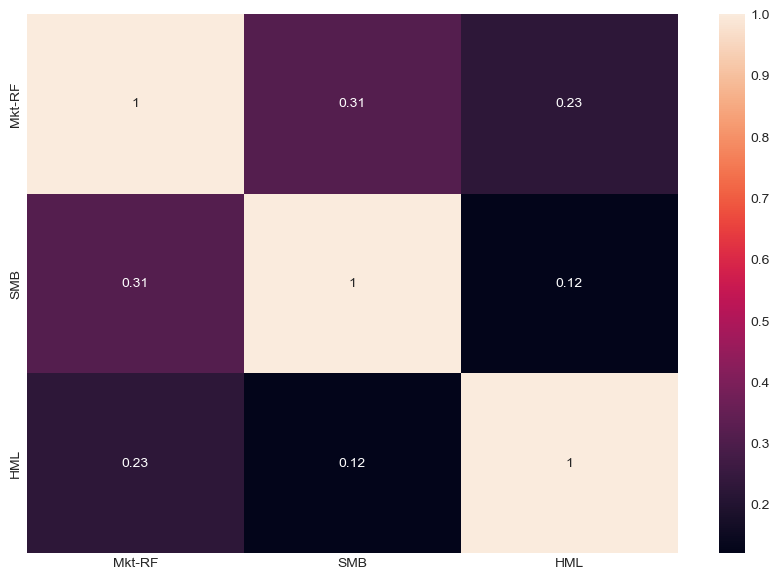

In [8]:
pmh.calc_correlations(factors)

### Does it achieve this in each subsample?

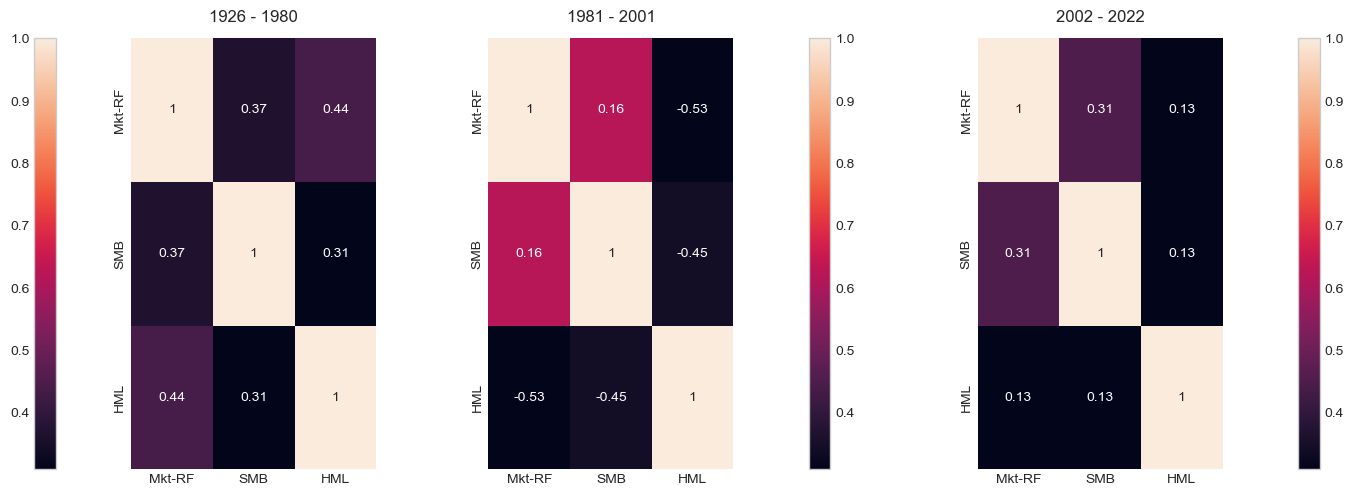

In [9]:
sub_1980 = factors.loc[:'1980']
sub_2001 = factors.loc['1981':'2001']
sub_2024 = factors.loc['2002':]

fig, (ax,ax2,ax3) = plt.subplots(ncols=3)
fig.subplots_adjust(wspace=0.01)
fig.tight_layout(pad=1)

sns.heatmap(sub_1980.corr(), ax=ax, cbar=False, annot = True).set_title('1926 - 1980', fontdict={'fontsize':12}, pad=12)
fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.2)

sns.heatmap(sub_2001.corr(), ax=ax2, cbar=False, annot = True).set_title('1981 - 2001', fontdict={'fontsize':12}, pad=12)
fig.colorbar(ax.collections[0],ax=ax2,location="right", use_gridspec=False, pad=0.2)

sns.heatmap(sub_2024.corr(), ax=ax3, cbar=False, annot = True).set_title('2002 - 2022', fontdict={'fontsize':12}, pad=12)
fig.colorbar(ax.collections[0],ax=ax3,location="right", use_gridspec=False, pad=0.2)

fig.set_figwidth(15)
plt.show()

<span style="color:red;">

Yes, the low correlations are still achieved in the sub-samples we have selected for study.

<span>

### 2.4) Plot the cumulative returns of the three factors. Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

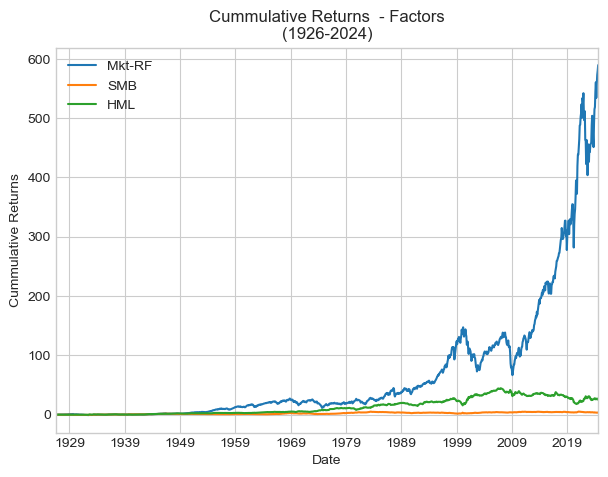

In [10]:
pmh.calc_cummulative_returns(factors, name=' - Factors\n(1926-2024)')

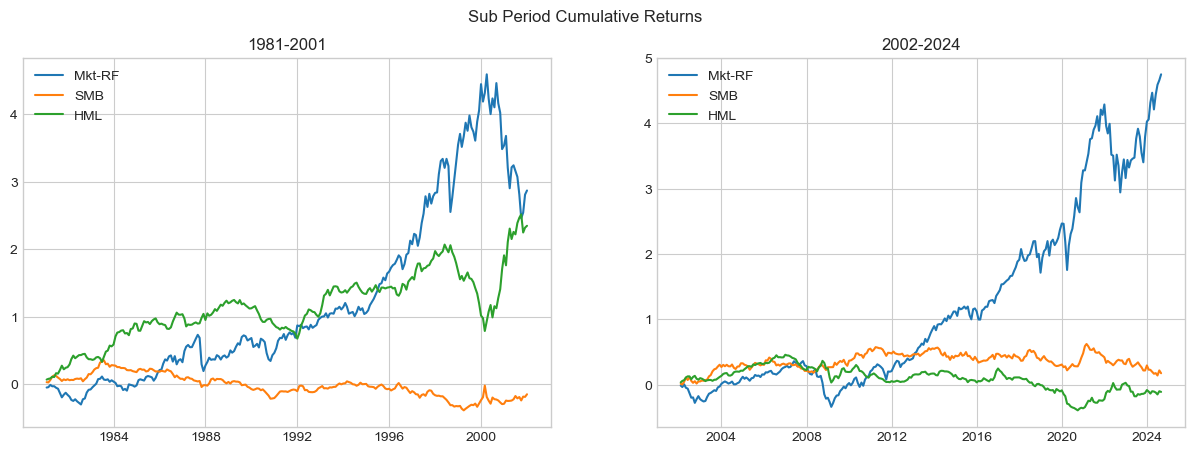

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sub Period Cumulative Returns')
ax1.plot(((sub_2001 + 1).cumprod() - 1))
ax2.plot(((sub_2024 + 1).cumprod() - 1))

fig.set_figwidth(15)
ax1.legend(sub_2001.columns)
ax2.legend(sub_2024.columns)

ax1.title.set_text('1981-2001')
ax2.title.set_text('2002-2024')

### 2.5 Does it appear that all three factors were valuable in 1981-2001? And post-2001? Would you advise DFA to continue emphasizing all three factors?

<span style="color:red;">

As per the graphs above, it appears that the market risk factor was valuable in both sub-samples. However, the Market Factor sees a steep decline with the Tech bubble burst in late 2001, during which time the value factor benefits from the depressed stock prices to post a premium. The Size factor posts near zero or negative returns for the entire sub-sample of 1981-2001. 

With a good recovery post the Tech Bubble burst and similar bull run post the 2008 financial crisis, the Market-factor significantly outperforms Size and Value in the 2002-2022 sub-sample. Both the Size and Value factors post meagre returns during this period, with the value factor experiencing declining premiums as several mega-cap tech companies traded further away from their fundamentals. This Value factor might still be beneficial given its diversification effects.

Though all 3 factors still possess some relevant characteristics, it appears that Factor rotation might be a better strategy in hindsight. The size factor seems out of favor for a long time now and the returns seem correlated to the Market Factor. DFA should also try to explore other factors such as volatility, liquidity, momentum etc. to generate alpha while sticking to their belief of capital markets being efficient.

</span>

## 3. CAPM

DFA believes that premia in stocks and stock portfolios is related to the three factors. Let's test 25 equity portfolios that span a wide range of size and value measures

* **PORTFOLIOS:** Monthly total return data on 25 equity portfolios sorted by their size-value characteristics. Denote these as $r^{i}$, for n = 1,....,25.
* **Note** that while the factors were given as excess returns, the portfolios are total returns.
* **For this entire problem,** focus on the 1981-Present subsample.

### 3.1) Summary Statistics.

For each portfolio,

* Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns.
* Calculate the (annualized) univariate statistics from 1.1.

In [12]:
ports_summ = pmh.calc_summary_statistics(pf_excess_rets.loc['1981':], annual_factor=12, correlations=False, provided_excess_returns=True,
                            keep_columns=['Annualized Mean',
                                            'Annualized Vol',
                                            'Annualized Sharpe',
                                            'Annualized Historical VaR',
                                            'Annualized Historical CVaR'])
display(ports_summ)

,Annualized Mean,Annualized Vol,Annualized Sharpe,Annualized Historical VaR (5.00%),Annualized Historical CVaR (5.00%)
SMALL LoBM,0.0067,0.2738,0.0244,-0.4367,-0.5916
ME1 BM2,0.0887,0.2364,0.3752,-0.3282,-0.4943
ME1 BM3,0.0920,0.2013,0.4572,-0.2987,-0.4271
ME1 BM4,0.1160,0.1943,0.5971,-0.2666,-0.4177
SMALL HiBM,0.1278,0.2100,0.6086,-0.3067,-0.4545
ME2 BM1,0.0589,0.2452,0.2401,-0.3606,-0.5320
ME2 BM2,0.1005,0.2055,0.4891,-0.2967,-0.4399
ME2 BM3,0.1059,0.1858,0.5703,-0.2719,-0.4182
ME2 BM4,0.1088,0.1821,0.5977,-0.2637,-0.4144
ME2 BM5,0.1160,0.2156,0.5380,-0.3339,-0.5033


* Can the difference in mean excess returns of the portfolios be explained by differences in their volatilities? Or by their VaR(.05) statistics?

<span style="color:red;">

The plots below suggest that very little of the differences in mean excess returns is explained by differences in volatilities or VaR statistics--at least very little is explained by linear relationships. I also provide the $R^2$ of a cross-sectional regression between the mean excess returns and volatility, mean excess returns and VaR, and mean returns and both volatility and VaR. None of the cross-sectional regressions provide much explainability of the variance among mean excess returns.

</span>

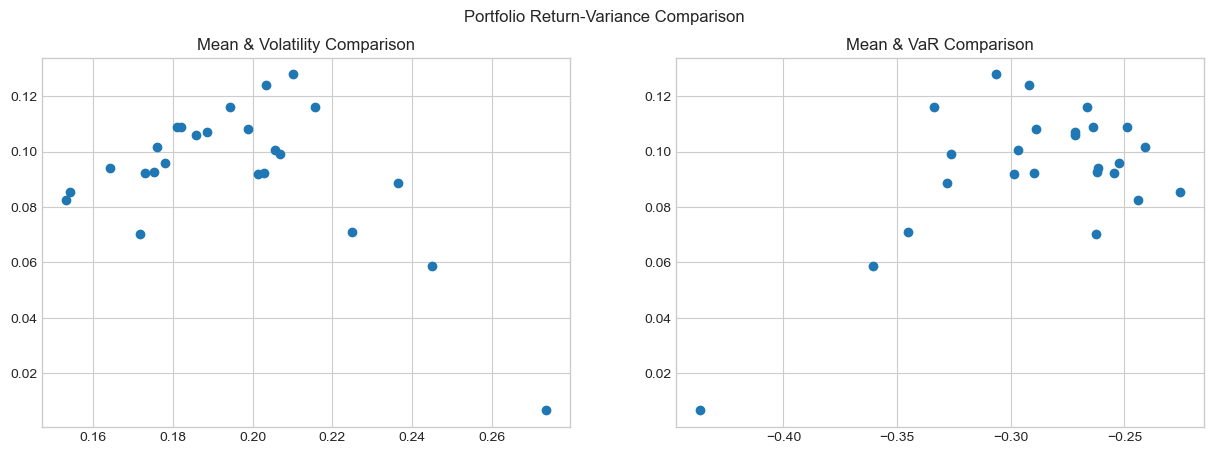

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Portfolio Return-Variance Comparison')
ax1.scatter(ports_summ.loc[:,['Annualized Vol']],ports_summ.loc[:,['Annualized Mean']])
ax2.scatter(ports_summ.loc[:,['Annualized Historical VaR (5.00%)']],ports_summ.loc[:,['Annualized Mean']])

fig.set_figwidth(15)
ax1.title.set_text('Mean & Volatility Comparison')
ax2.title.set_text('Mean & VaR Comparison')

In [14]:
def regress(df, y, X):
    if isinstance(X, str):
        return pmh.calc_regression(df[y].to_frame(), ports_summ[X].to_frame(), annual_factor=1, warnings=False, intercept=True)['R-Squared']
    else:
        return pmh.calc_regression(df[y].to_frame(), ports_summ[X], annual_factor=1, warnings=False, intercept=True)['R-Squared']

summ = pd.concat([regress(ports_summ, 'Annualized Mean', 'Annualized Vol'),
           regress(ports_summ, 'Annualized Mean', 'Annualized Historical VaR (5.00%)'),
           regress(ports_summ, 'Annualized Mean', ['Annualized Vol', 'Annualized Historical VaR (5.00%)'])], axis=1)
summ.index = ['R-Squared']
summ.columns = ['Vol', 'VaR', 'Both']
display(summ.T.style.format("{:.2%}"))

,R-Squared
Vol,20.36%
VaR,32.52%
Both,42.71%


### 3.2 CAPM

The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio's) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT.)
Specifically, it asserts that, for any excess return, $\tilde{r}^{i}$, its mean is proportional to the mean excess return of the market, $\tilde{r}^{m}$, where the proporitonality is the regression beta of $\tilde{r}^{i}$ on $\tilde{r}^{m}$.

$$\mathop{\mathbb{E}}[\tilde{r}^{i}_{t}] = \beta \mathop{\mathbb{E}}[\tilde{r}^{m}_{t}]$$

Let's examine whether that seems plausible.

### 3.2.a For each of the n = 25 test portfolios, run the CAPM time-series regression:

$$\tilde{r}_{t}^{i} = \alpha^{i} + \beta^{i,m}\tilde{r}^{m}_{t} + \epsilon_{t}$$

So you are running 25 separate regressions, each using the T-sized sample of time-series data.

### 3.2.b) Report the estimated $β^{i,m}$, Treynor Ratio, $α^{i}$, and Information Ratio for each of the n regressions.

In [15]:
# Answering both 3.2.a and 3.2.b
pmh.calc_iterative_regression(pf_excess_rets.loc['1981':], factors.loc['1981':,'Mkt-RF'].to_frame(), 
                              keep_columns=['Annualized Alpha', 'Beta', 'R-Squared', 
                                            'Annualized Treynor Ratio', 'Annualized Information Ratio', 
                                            'Annualized Tracking Error'],
                                  annual_factor=12, 
                                  warnings=False)

,Annualized Alpha,R-Squared,Mkt-RF Beta,Annualized Treynor Ratio,Annualized Information Ratio,Annualized Tracking Error
SMALL LoBM,-0.1067,0.5961,1.3564,0.0049,-0.6134,0.1740
ME1 BM2,-0.0088,0.5905,1.1657,0.0761,-0.0580,0.1513
ME1 BM3,0.0046,0.6550,1.0452,0.0880,0.0391,0.1182
ME1 BM4,0.0347,0.6085,0.9725,0.1193,0.2854,0.1216
SMALL HiBM,0.0447,0.5450,0.9950,0.1285,0.3151,0.1417
ME2 BM1,-0.0530,0.7240,1.3386,0.0440,-0.4119,0.1288
ME2 BM2,0.0056,0.7405,1.1349,0.0886,0.0538,0.1047
ME2 BM3,0.0199,0.7445,1.0286,0.1030,0.2124,0.0939
ME2 BM4,0.0273,0.6957,0.9747,0.1117,0.2722,0.1004
ME2 BM5,0.0228,0.6487,1.1144,0.1041,0.1786,0.1278


### 3.2.c) If CAPM were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

<span style="color:red;">

If CAPM were true, we would observe the **same** Treynor ratios for all 25 portfolios as the portfolio returns should completely be a function of market returns (SPY). However, as we observe, the portfolios have varying Treynor ratios.

The alphas should have been lower (ideally 0) for all portfolios and we should have also seen low absolute magnitude of the residuals, resulting in lower (ideally 0) information ratios. But, we observe that the alphas are non-zero and the Information ratios are greater in magnitude than the alphas, suggesting the presence of other regressors that should be included in the model.

</span>

## 3.3) Cross-sectional Estimation

Let's test (CAPM) directly. We already have what we need:

* The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
* The regressor, (x): the market beta from each of the n = 25 time-series regressions.
* Then we can estimate the following equation:

$$  \underbrace{\mathop{\mathbb{E}}[\tilde{r}^{i}]}_\text{n x 1 data} = 
    \underbrace{\eta}_\text{regression intercept} +
    \underbrace{\beta^{i,m}}_\text{n x 1 data} *\underbrace{\lambda_{m}}_\text{regression estimate} + \underbrace{\upsilon}_\text{n x 1 residuals}
$$
 
* **Note** that we use sample means as estimates of $\mathop{\mathbb{E}}[\tilde{r}^{i}]$.
* **This is a weird regression!** The regressors are the betas from the time-series regressions we already ran!
* This is a single regression, where we are combining evidence across all n = 25 series. Thus, **it is a cross-sectional regression!**
* The notation is trying to emphasize that **the intercept is different than the time-series** $\alpha$ and that the regressor coefficient is different than the time-series betas.

3.3.a-c) 
* Report the R-squared of this regression.
* Report the intercept, $\upsilon$.
* Report the regression coefficient, $\lambda_{m}$.

In [16]:
pmh.calc_cross_section_regression(pf_excess_rets.loc['1981':], factors.loc['1981':,'Mkt-RF'].to_frame(),
                                  provided_excess_returns=True, annual_factor=12,
                                  keep_columns=['R-Squared', 'Annualized Eta', 'Annualized Lambda']).T

Lambda represents the premium calculated by the cross-section regression and the historical premium is the average of the factor excess returns


,Mkt-RF Cross-Section Regression
Annualized Eta,0.2086
R-Squared,0.3006
Mkt-RF Annualized Lambda,-0.1082


###  What would these three statistics be if (CAPM) were true?
<span style="color:red;">

If CAPM were true and the regression beta for the excess returns on the market factor explained the portfolio excess returns, we would expect:
* A very low value for the intercept term ($\eta$)
* A very high $R^2$ 
* $\beta$ would vary company to company as it would simply express how a given security moves relative to the market

This is because CAPM suggests that all market betas should be explaining the same factor i.e. SPY, so we should expect them to be heavily correlated. However, our statistics here suggest otherwise.

</span>

### 3.4) Broadly speaking, do these results support DFA's belief in size and value portfolios containing premia unrelated to the CAPM?

<span style="color:red;">

Low $R^2$ and high $\eta$ from the cross-sectional regression above suggest other risk factors in the market can explain excess returns of equity portfolios. Also, as shown by the Fama-French paper, size and value have posted premiums in the past and thus can be used to explain mean excess returns in better capacity than CAPM alone. These results do support DFA's belief in size and value portfolios containing premia unrelated to CAPM.

Using Size and Value as additional factors in the regression for the 25 portfolios, we see a higher R-Squared in the regression, further strengthening DFA's belief in existence of premia in Value and Size Factors

</span>

# 4) Extensions

### 4.1) Re-do the analysis of 3.3 and 3.4.
But instead of using the market return as the factor, use all three factors, (MKT, SMB, and HML). Note again that all three are already given as excess returns, so there is no need to use the risk-free rate data.

Thus, instead of testing (CAPM), you will be testing the Fama-French 3-Factor Model.
$$\mathop{\mathbb{E}}[\tilde{r}^{i}_{t}] = \beta^{i,m} \mathop{\mathbb{E}}[\tilde{r}^{m}_{t}] +  \beta^{i,s} \mathop{\mathbb{E}}[\tilde{r}^{s}_{t}] +  \beta^{i,v} \mathop{\mathbb{E}}[\tilde{r}^{v}_{t}]$$

In [17]:
capm_ts = pmh.calc_iterative_regression(pf_excess_rets.loc['1981':], factors.loc['1981':],
                              warnings=False,
                              keep_columns=['Annualized Alpha', 'Beta', 'R-Squared',
                                            'Annualized Treynor Ratio', 'Annualized Information Ratio', 
                                            'Annualized Tracking Error'])
display(capm_ts)

,Annualized Alpha,R-Squared,Mkt-RF Beta,SMB Beta,HML Beta,Annualized Information Ratio,Annualized Tracking Error
SMALL LoBM,-0.0858,0.8882,1.1118,1.3925,-0.2538,-0.9375,0.0915
ME1 BM2,0.0014,0.9109,0.9655,1.3177,-0.0144,0.0203,0.0706
ME1 BM3,0.0006,0.9393,0.9231,1.0651,0.2774,0.0120,0.0496
ME1 BM4,0.0222,0.9403,0.8778,1.0658,0.4774,0.4673,0.0475
SMALL HiBM,0.0231,0.8763,0.9298,1.0660,0.6914,0.3120,0.0739
ME2 BM1,-0.0324,0.9399,1.1419,1.0233,-0.3103,-0.5395,0.0601
ME2 BM2,0.0072,0.9393,1.0138,0.9159,0.1213,0.1412,0.0506
ME2 BM3,0.0087,0.9208,0.9740,0.7192,0.3892,0.1656,0.0523
ME2 BM4,0.0084,0.9390,0.9413,0.7483,0.5751,0.1861,0.0450
ME2 BM5,-0.0058,0.9536,1.0892,0.9298,0.8328,-0.1243,0.0464


In [18]:
pmh.calc_cross_section_regression(pf_excess_rets.loc['1981':], factors.loc['1981':],
                                  provided_excess_returns=True, annual_factor=12,
                                  keep_columns=['R-Squared', 'Annualized Eta', 'Annualized Lambda']).T

Lambda represents the premium calculated by the cross-section regression and the historical premium is the average of the factor excess returns


,Mkt-RF + SMB + HML Cross-Section Regression
Annualized Eta,0.1865
R-Squared,0.4628
Mkt-RF Annualized Lambda,-0.1002
SMB Annualized Lambda,-0.0019
HML Annualized Lambda,0.0351


<span style="color:red;">

These regression results display meaningfully better explanatory power. In the regressions above for each of the portfolios against the Fama-French 3 factors, we see significantly higher $R^2$ values across each portfolio, with many of them over 90%. We also see significantly lower tracking errors and information ratios. 

The cross-sectional regression, however, still does not provide much explanatory power. Though, this cross-sectional regression with the Fama-French 3 factors is considerably more explanatory than the CAPM cross-sectional regression.

</span>

### 4.2) Re-do the analysis of 3.3 and 3.4 again. 
But instead of using the market return as the factor, use a new factor: the in-sample tangency portfolio of the n = 25 portfolios.

**You will not use the factor data for this problem!**
* Calculate $\tilde{r}^{tan}$ by solving the MV optimization of the n excess returns.
* Consider this to be your single factor.

**Instead of testing (CAPM), you will test the MV model:**

$$\mathop{\mathbb{E}}[\tilde{r}^{i}_{t}] = \beta^{i,tan} \mathop{\mathbb{E}}[\tilde{r}^{tan}_{t}]$$

***What do you find?***

In [19]:
tan_wts = pmh.calc_tangency_weights(pf_excess_rets['1981':])
tan_pfs = (pf_excess_rets['1981':] @ tan_wts)
pmh.calc_iterative_regression(pf_excess_rets['1981':], tan_pfs,
                              warnings=False,
                              keep_columns=['Annualized Alpha', 'Beta', 'R-Squared',
                                            'Annualized Treynor Ratio', 'Annualized Information Ratio', 
                                            'Annualized Tracking Error', 'Fitted Mean'])

,Annualized Alpha,R-Squared,Tangency Weights Beta,Annualized Treynor Ratio,Annualized Information Ratio,Annualized Tracking Error,Fitted Mean,Annualized Fitted Mean
SMALL LoBM,0.0000,0.0002,0.0174,0.3830,0.0000,0.2737,0.0006,0.0067
ME1 BM2,0.0000,0.0413,0.2315,0.3830,0.0000,0.2315,0.0074,0.0887
ME1 BM3,0.0000,0.0613,0.2402,0.3830,0.0000,0.1950,0.0077,0.0920
ME1 BM4,0.0000,0.1046,0.3028,0.3830,0.0000,0.1838,0.0097,0.1160
SMALL HiBM,0.0000,0.1087,0.3338,0.3830,0.0000,0.1983,0.0107,0.1278
ME2 BM1,0.0000,0.0169,0.1537,0.3830,0.0000,0.2431,0.0049,0.0589
ME2 BM2,0.0000,0.0702,0.2624,0.3830,0.0000,0.1982,0.0084,0.1005
ME2 BM3,0.0000,0.0954,0.2766,0.3830,0.0000,0.1767,0.0088,0.1059
ME2 BM4,0.0000,0.1048,0.2841,0.3830,0.0000,0.1723,0.0091,0.1088
ME2 BM5,0.0000,0.0849,0.3028,0.3830,0.0000,0.2063,0.0097,0.1160


In [24]:
pmh.calc_cross_section_regression(pf_excess_rets.loc['1981':], tan_pfs,
                                  provided_excess_returns=True, annual_factor=12,
                                  keep_columns=['R-Squared', 'Annualized Eta', 'Annualized Lambda']).T

Lambda represents the premium calculated by the cross-section regression and the historical premium is the average of the factor excess returns


,Tangency Weights Cross-Section Regression
Annualized Eta,0.0000
R-Squared,1.0000
Tangency Weights Annualized Lambda,0.3830


<span style="color:red;">

These are precisely the kind of results we expect we should get from CAPM! So what is happening here? We are taking the tangency portfolio of the securities in this universe, and we are regressing that tangency portfolio against the securities which compose it. The cross-sectional regression resulting from this exercise exactly aligns with the expected result of CAPM. So, the tangency portfolio of a "closed market" is equivalent to the theoretical market portfolio proposed by CAPM theory.

And what does this tell us? It tells us that CAPM asserts that the "market portfolio" should be the tangency portfolio of all available securities in the market. Therefore, if we were able to find a global "market portfolio" that truly captured all return elements of all assets in trading markets, then the cross-sectional regression of this global "market portfolio" with any and all of its component assets will yield a perfectly fit linear regression.

</span>

### 4.3) In problem 3.3, we measured how well the CAPM performs by running the analogous regression. In fact, we could have assessed it directly from the time-series regressions.

#### 4.3.a) Report the mean-absolute-error of the CAPM:

$$\text{MAE} = \frac{1}{n}\sum^{n}_{i=1}|\alpha_{i}|$$

In [26]:
pd.DataFrame((capm_ts['Annualized Alpha']).abs().mean(), columns = ['MAE (%)'], index = ['CAPM'])

,MAE (%)
CAPM,0.0145


#### 4.3.b) Under classic statistical assumptions, we can test the null hypothesis that the CAPM works by calculating,

$$\text{H} = \text{T} \ [1+(\text{SR}_{m})^{2}]^{-1} \alpha^{'}\Sigma^{-1}_{\epsilon}\alpha ~ \chi^{2}_{n}$$

**Note the following:**
* $\alpha$ is an n x 1 vector of the individual regression alphas, $\alpha^{i}$.
* $\Sigma_{\epsilon}$ is the n x n covariance matrix of the time-series of regression residuals, $\epsilon^{i}$, corresponding to each regression.
* $\text{SR}_{m}$ is the Sharpe-Ratio of $\tilde{r}^{m}$.

The test statistic, H, has a $\chi^2$ distribution with n = 25 degrees of freedom. So under the null hypothesis of the CAPM holding, H should be small, and the distribution allows us to calculate the probability of seeing such a large H, conditional on the CAPM being true.

In [33]:
resid = pd.DataFrame()
for pf in pf_excess_rets.columns:
    r = pmh.calc_regression(pf_excess_rets.loc['1981':, pf], factors.loc['1981':, 'Mkt-RF'].to_frame('Mkt-RF'), 
                            annual_factor=12, warnings=False, return_model=True, return_fitted_values=False)
    r = r.resid.to_frame(pf)
    resid = pd.concat([resid, r], axis=1)

resid

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,0.0223,0.0446,0.0622,0.0520,0.0675,0.0122,0.0460,0.0375,0.0545,0.0749,...,-0.0167,0.0081,0.0372,0.0426,0.0547,-0.0225,-0.0380,-0.0310,0.0361,0.0598
1981-02-28,-0.0436,-0.0164,-0.0049,0.0008,0.0050,-0.0177,-0.0018,0.0099,0.0165,0.0197,...,-0.0036,0.0081,0.0282,-0.0046,0.0195,0.0154,0.0035,-0.0222,0.0157,-0.0238
1981-03-31,0.0213,0.0416,0.0360,0.0401,0.0219,0.0248,0.0306,0.0280,0.0293,0.0216,...,0.0388,0.0172,0.0366,0.0252,0.0260,-0.0190,-0.0135,-0.0408,-0.0095,0.0321
1981-04-30,0.0557,0.0612,0.0463,0.0542,0.0614,0.0387,0.0482,0.0466,0.0451,0.0511,...,0.0147,0.0028,0.0145,0.0114,0.0265,-0.0182,-0.0348,-0.0203,0.0300,-0.0200
1981-05-31,0.0456,0.0373,0.0309,0.0094,0.0120,0.0534,0.0086,0.0141,-0.0120,0.0104,...,0.0232,0.0085,0.0058,-0.0034,0.0191,0.0023,-0.0345,-0.0331,0.0261,-0.0083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,-0.0579,-0.0214,-0.0314,-0.0366,-0.0374,-0.0060,-0.0349,-0.0217,-0.0176,-0.0232,...,-0.0060,-0.0199,-0.0184,-0.0288,-0.0152,0.0009,0.0494,-0.0094,-0.0119,-0.0129
2024-05-31,0.0180,-0.0217,-0.0008,-0.0139,-0.0034,-0.0121,-0.0219,0.0044,-0.0006,-0.0039,...,-0.0296,-0.0294,-0.0250,0.0041,-0.0153,0.0113,-0.0030,-0.0126,-0.0028,-0.0072
2024-06-30,-0.0758,-0.0589,-0.0894,-0.0503,-0.0610,-0.0560,-0.0568,-0.0549,-0.0487,-0.0657,...,-0.0424,-0.0518,-0.0556,-0.0496,-0.0623,0.0286,-0.0192,-0.0259,-0.0454,-0.0274


In [37]:
T = pf_excess_rets['1981':].shape[0]
SR = (factors['1981':]['Mkt-RF'].mean() / factors['1981':]['Mkt-RF'].std()) * np.sqrt(12)
Sigma = resid.cov()
Sigma_inv = pd.DataFrame(np.linalg.inv(Sigma), index=Sigma.index, columns=Sigma.columns)
alpha = capm_ts['Annualized Alpha']

H = T * (1 + SR**2)**(-1) * (alpha @ Sigma_inv @ alpha)

print('H = {:.2f}'.format(H))
pvalue = 1 - chi2.cdf(H, df=25)
print('p-value = {:.4f}'.format(pvalue))

H = 14806.89
p-value = 0.0000


#### 4.3.c) Which is a stricter test: checking whether any of the n values of $\alpha^{i}$ have a statistically significant t-test or checking whether H calculated above is significant?

<span style="color:red;">

* By definition, a joint test is stricter than testing the conditions individually.

* In our case, we can see that most of the alphas (20 alphas) are not significant (as p-value > 0.05) while 5 alphas are signficant (as p-value < 0.05) as judged by their individual t-stats, yet all of them are jointly significant as judged by this joint test.

</span>

### 4.3.d) Conceptually, how does the test-statistic H relate to checking whether $\tilde{r}^{m}$ spans the tangency portfolio?

<span style="color:red;">

* We have demonstrated that an LFM is exactly the same as asserting that a set of factors spans the MV frontier, (and thus spans the tangency portfolio.) 
* Thus, this test can be interpreted as checking whether investing in the alphas gets beyond the tangency portfolio. The test stat is basically comparing the square SR of the alphas to the square SR of the factors.

</span>